# Jordan Titanic Data Features
**Author:** Jordan  
**Date:** October 31, 2025 <br>
**Objective:** Data inspection, exploration, and preparation for training/test splits.


## Introduction
This project uses seaborn's Titanic dataset to demonstrate pre-processing of data before splitting for analysis and to compare splitting methods.  We will inspect and clean the data before comparing standard pseudo-random splitting to stratified spliting.

## Imports
First, we import the necessary Python libraries for our analysis. 

In [511]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Section 1. Load and Inspect the Data

Next, we load the Titanic dataset from seaborn and view its head.

In [512]:
titanic_df: pd.DataFrame = sns.load_dataset("titanic")
titanic_df.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

We impute missing values for 'age' and 'embark_town' using their median and mode respectively.

In [513]:
median_age = titanic_df["age"].median()
titanic_df["age"] = titanic_df["age"].fillna(median_age)
# 'embark_town' is redundant?
mode_embark = titanic_df["embark_town"].mode()[0]
titanic_df["embark_town"] = titanic_df["embark_town"].fillna(mode_embark)

### 2.2 Feature Engineering

Now, we add the feature 'family_size', number of family members on board, by counting sibsp (number of siblings or spouses on board), parch (number of parents or children on board), and 1 to count the individual. 

In [514]:
titanic_df["family_size"] = titanic_df["sibsp"] + titanic_df["parch"] + 1

Then, we numericaly encode the categorical features 'sex', 'embarked', and 'alone'.

In [515]:
# 'sex' redundant?
titanic_df["sex"] = titanic_df["sex"].map({"male": 0, "female": 1})
# 'embarked' redundant?
titanic_df["embarked"] = titanic_df["embarked"].map({"C": 0, "Q": 1, "S": 2})
titanic_df["alone"] = titanic_df["alone"].astype(int)

## Section 3. Feature Selection and Justification

### 3.1  Choose Features and Target

With classification in mind, we now select input and target features for our model.  We will consider the following three different cases for our models:

Case 1: 
- Input Feature: 'alone'
- Target: 'survived'

Case 2:
- Input Feature: 'age'
- Target: 'survived'

Case 3:
- Input Features: 'age' and 'family_size' 
- Target: 'survived'

### 3.2 Define X (features) and y (target)

In [516]:
# Case 1: Feature = 'alone'
X1 = titanic_df[["alone"]]
y1 = titanic_df["survived"]

# Case 2: Feature = 'age'
X2 = titanic_df[["age"]].dropna()
y2 = titanic_df.loc[X2.index, "survived"]

# Case 3: Features = 'age' + 'family_size'
X3 = titanic_df[["age", "family_size"]].dropna()
y3 = titanic_df.loc[X3.index, "survived"]

Reflection 3:

- Why are these features selected?
- Are there features that are likely to be highly predictive of survival?

## Section 4. Train a Classification Model (Decision Tree)
### 4.1 Split the Data

First, we split our data for each case, using a random stratified shuffle split to ensure that both the training and test sets have a similar proportion of each class of our target feature.

In [517]:
# Case 1: Feature = 'alone'
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print("Case 1 - 'alone':")
print("Train size:", len(X1_train), "| Test size:", len(X1_test))

Case 1 - 'alone':
Train size: 712 | Test size: 179


In [518]:
# Case 2: Feature = 'age'
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print("Case 2 - 'age':")
print("Train size:", len(X2_train), "| Test size:", len(X2_test))

Case 2 - 'age':
Train size: 712 | Test size: 179


In [519]:
# Case 3: Features = 'age' + 'family_size'
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print("Case 3 - 'age' + 'family_size':")
print("Train size:", len(X3_train), "| Test size:", len(X3_test))

Case 3 - 'age' + 'family_size':
Train size: 712 | Test size: 179


### 4.2 Create and Train Model (Decision Tree)

Now, we create and train a decision tree model with no random initializer argument.

In [520]:
# CASE 1: Decision Tree using 'alone'
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

# CASE 2: Decision Tree using 'age'
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

# CASE 3: Decision Tree using 'age' and 'family_size'
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train);

### 4.3 Predict and Evaluate Model Performance

At this stage, we predict and evaluate all three cases.

In [521]:
# Case 1: Feature = 'alone'
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - 'alone'):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - 'alone'):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - 'alone'):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - 'alone'):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [522]:
# Case 2: Feature = 'age'
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - 'age'):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - 'age'):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - 'age'):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - 'age'):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [523]:
# Case 3: Features = 'age' + 'family_size'
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - 'age' + 'family_size'):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - 'age' + 'family_size'):")
print(classification_report(y3_test, y3_test_pred))
pd.DataFrame(classification_report(y3_test, y3_test_pred, output_dict=True)).T.round(2)

Results for Decision Tree on training data (Case 3 - 'age' + 'family_size'):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - 'age' + 'family_size'):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



precision  recall  f1-score  support
0                  0.64    0.75      0.69   110.00
1                  0.45    0.33      0.38    69.00
accuracy           0.59    0.59      0.59     0.59
macro avg          0.55    0.54      0.54   179.00
weighted avg       0.57    0.59      0.57   179.00

### 4.4 Report Confusion Matrix (as a heatmap)

We then proceed to plot a confusion matrix for all cases.

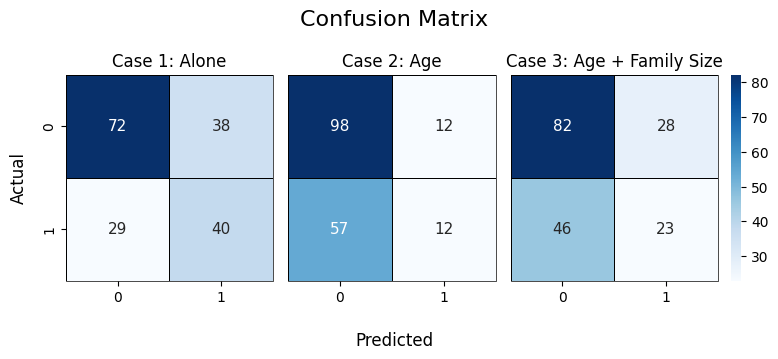

In [528]:
case_dict: dict = {
    "Case 1: Alone": (y1_test, y1_test_pred),
    "Case 2: Age": (y2_test, y2_test_pred),
    "Case 3: Age + Family Size": (y3_test, y3_test_pred)
}
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,3.5), gridspec_kw={"width_ratios": [1, 1, 1.25]})

for ax, (case, (y_test, y_test_pred)) in zip(axes, case_dict.items(), strict=True):
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", ax=ax, cbar=ax is axes[-1],
                annot_kws={"size": 11}, linewidths=.5, linecolor="black")
    ax.patch.set_edgecolor("black")
    ax.patch.set_linewidth(0.5)
    ax.set(title=f"{case}")

for ax in axes[1:]: ax.set( yticks=[], ylabel="")  # noqa: E701
fig.suptitle("Confusion Matrix", size=16)
fig.supxlabel("Predicted")
fig.supylabel("Actual")
plt.tight_layout()
plt.show()

### 4.5 Report Decision Tree Plot

Finally, we plot the decision tree model for each case.

In [525]:
tree_dict: dict = {
    "Case 1: Alone": (tree_model1, X1),
    "Case 2: Age": (tree_model2, X2),
    "Case 3: Age + Family Size": (tree_model3, X3)
}
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(100,90))

for ax, (case, (model, feature)) in zip(axes, tree_dict.items(), strict=True):
    plot_tree(model, feature_names=feature.columns.tolist(), ax=ax,
              class_names=["Not Survived", "Survived"], filled=True)
    ax.set_title(f"Decision Tree - {case}", size=70)

plt.tight_layout()
plt.show()
fig.savefig("tree_all_cases.png")

### Reflection 4:
- How well did the different cases perform?
- Are there any surprising results?
- Which inputs worked better? 

## Section 5. Compare Alternative Models (SVC, NN)

